___

# Deep Learning Project – Handwritten Digit Recognition using Python
___

<div class="alert alert-block alert-info"> 
</div>


***Category:*** Machine Learning

**Programming Language:** Python

***Tools & Libraries:*** Keras, Tensorflow

***Front End:*** Python – Tkinter

**Back End:** Python

**Prerequisites:** Python, Machine Learning

## Introduction 

***What is it ?***   
The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.
  
***About the Python Project***   
In this Python project, we are going to implement a handwritten digit recognition app using the MNIST dataset. We will be using a special type of deep neural network that is Convolutional Neural Networks.  
In the end, we are going to build a GUI in which you can draw the digit and recognize it straight away.


***Prerequisites***  
The interesting Python project requires you to have basic knowledge of Python programming, deep learning with Keras library and the Tkinter library for building GUI.

Install the necessary libraries for this project using this command: `pip install numpy, tensorflow, keras, pillow`

## Table of Contents 
* [1. Import and load the data file ](#chap1)
* [2. Preprocess data](#chap2)
* [3. Create model ](#chap3)
* [4. Build the modelt](#chap4)
* [5. Predict the response](#chap5)

### 1. Import the libraries and load the dataset <a class="anchor" id="chap1"></a>  
First, we are going to import all the modules that we are going to need for training our model. The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels.

***Loading the MNIST Digit Images***  
The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

In [6]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

print('shape X train : ', x_train.shape)
print('shape X test : ', x_test.shape)
print('shape Y train : ', y_train.shape)
print('shape Y test : ', y_test.shape)


shape X train :  (60000, 28, 28)
shape X test :  (10000, 28, 28)
shape Y train :  (60000,)
shape Y test :  (10000,)


## Visualize Some Handwritten Images in the Dataset

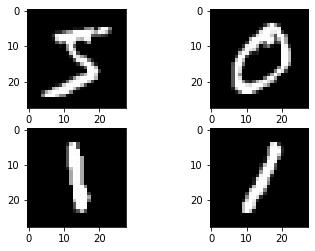

In [7]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[200], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[345], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

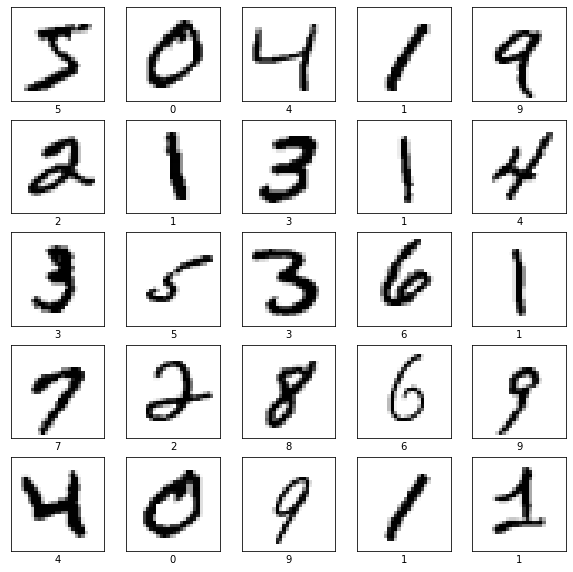

In [31]:
# Display of some images and associated label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Each element in the rectangular tensor corresponds to a number which represents a pixel intensity, as demonstrated by the following image:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements" />


### 2. Preprocess the data  <a class="anchor" id="chap2"></a>

The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).


In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
num_classes = len(class_names)
num_classes

10

In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 3. Create the model <a class="anchor" id="chap3"></a>
Now we will create our CNN model in Python data science project. A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. We will then compile the model with the Adadelta optimizer.

In [34]:
batch_size = 128
epochs = 20
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               2359552   
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)              

In [54]:
input_shape

(28, 28, 1)

### 4. Train the model <a class="anchor" id="chap4"></a>

In [35]:
%time hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("\n\nThe model has successfully trained")

Epoch 1/20
469/469 [==============================] - 57s 120ms/step - loss: 2.2757 - accuracy: 0.1824 - val_loss: 2.2253 - val_accuracy: 0.4238
Epoch 2/20
469/469 [==============================] - 57s 121ms/step - loss: 2.1898 - accuracy: 0.3418 - val_loss: 2.1161 - val_accuracy: 0.6027
Epoch 3/20
469/469 [==============================] - 59s 125ms/step - loss: 2.0718 - accuracy: 0.4624 - val_loss: 1.9608 - val_accuracy: 0.6602
Epoch 4/20
469/469 [==============================] - 57s 122ms/step - loss: 1.9047 - accuracy: 0.5427 - val_loss: 1.7449 - val_accuracy: 0.7043
Epoch 5/20
469/469 [==============================] - 57s 121ms/step - loss: 1.6883 - accuracy: 0.6014 - val_loss: 1.4823 - val_accuracy: 0.7502
Epoch 6/20
469/469 [==============================] - 55s 117ms/step - loss: 1.4505 - accuracy: 0.6423 - val_loss: 1.2187 - val_accuracy: 0.7875
Epoch 7/20
469/469 [==============================] - 56s 119ms/step - loss: 1.2416 - accuracy: 0.6745 - val_loss: 1.0030 - val_ac

### 5. Evaluate the model<a class="anchor" id="chap5"></a>


In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.39277184009552
Test accuracy: 0.8935999870300293


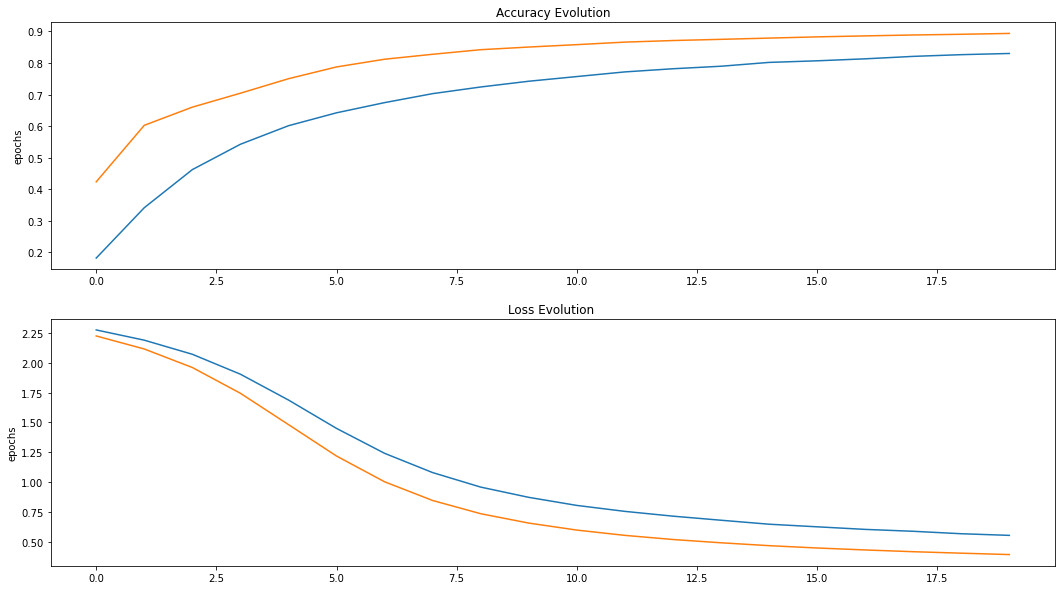

In [37]:
# Display of the evolution of the performances according to the epoc
plt.figure(figsize=(18,10))
#Evolution accuracy 
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Evolution')
plt.ylabel('Accuracy')
plt.ylabel('epochs')

#Evolution loss function 
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Evolution ')
plt.ylabel('Loss')
plt.ylabel('epochs')
plt.show()


In [38]:
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

The model has successfully trained
Saving the model as mnist.h5



### 6. Create GUI to predict digits <a class="anchor" id="chap5"></a>


In [17]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, ImageOps #from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5') # mnist_CNN  mnist digit_classifier


def predict_digit(img):
    #resize image to 28x28 pixels
    img.save('test.jpg')
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = ImageOps.invert(img)
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)


class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
        
    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
        
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')


app = App()
mainloop()